## Imports and settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import scipy
import os
import glob
import seaborn as sns
import itertools
import gc
import time
import scienceplots
import sys
import librosa
from nptdms import TdmsFile
from scipy import stats
from natsort import natsorted

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import seaborn as sns
from scipy.stats import norm
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline

sys.path.append('../utils/')
from utils.preprocessing import centimeter,one_column,two_column,cm_std,cm_bright,cm_highCon,cm_mark
np.random.seed(16)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["text.usetex"] = True
matplotlib.rcParams['figure.dpi'] = 300
plt.style.use(['science','nature'])
plt.rcParams['figure.constrained_layout.use'] = True
mpl.rcParams.update(one_column)

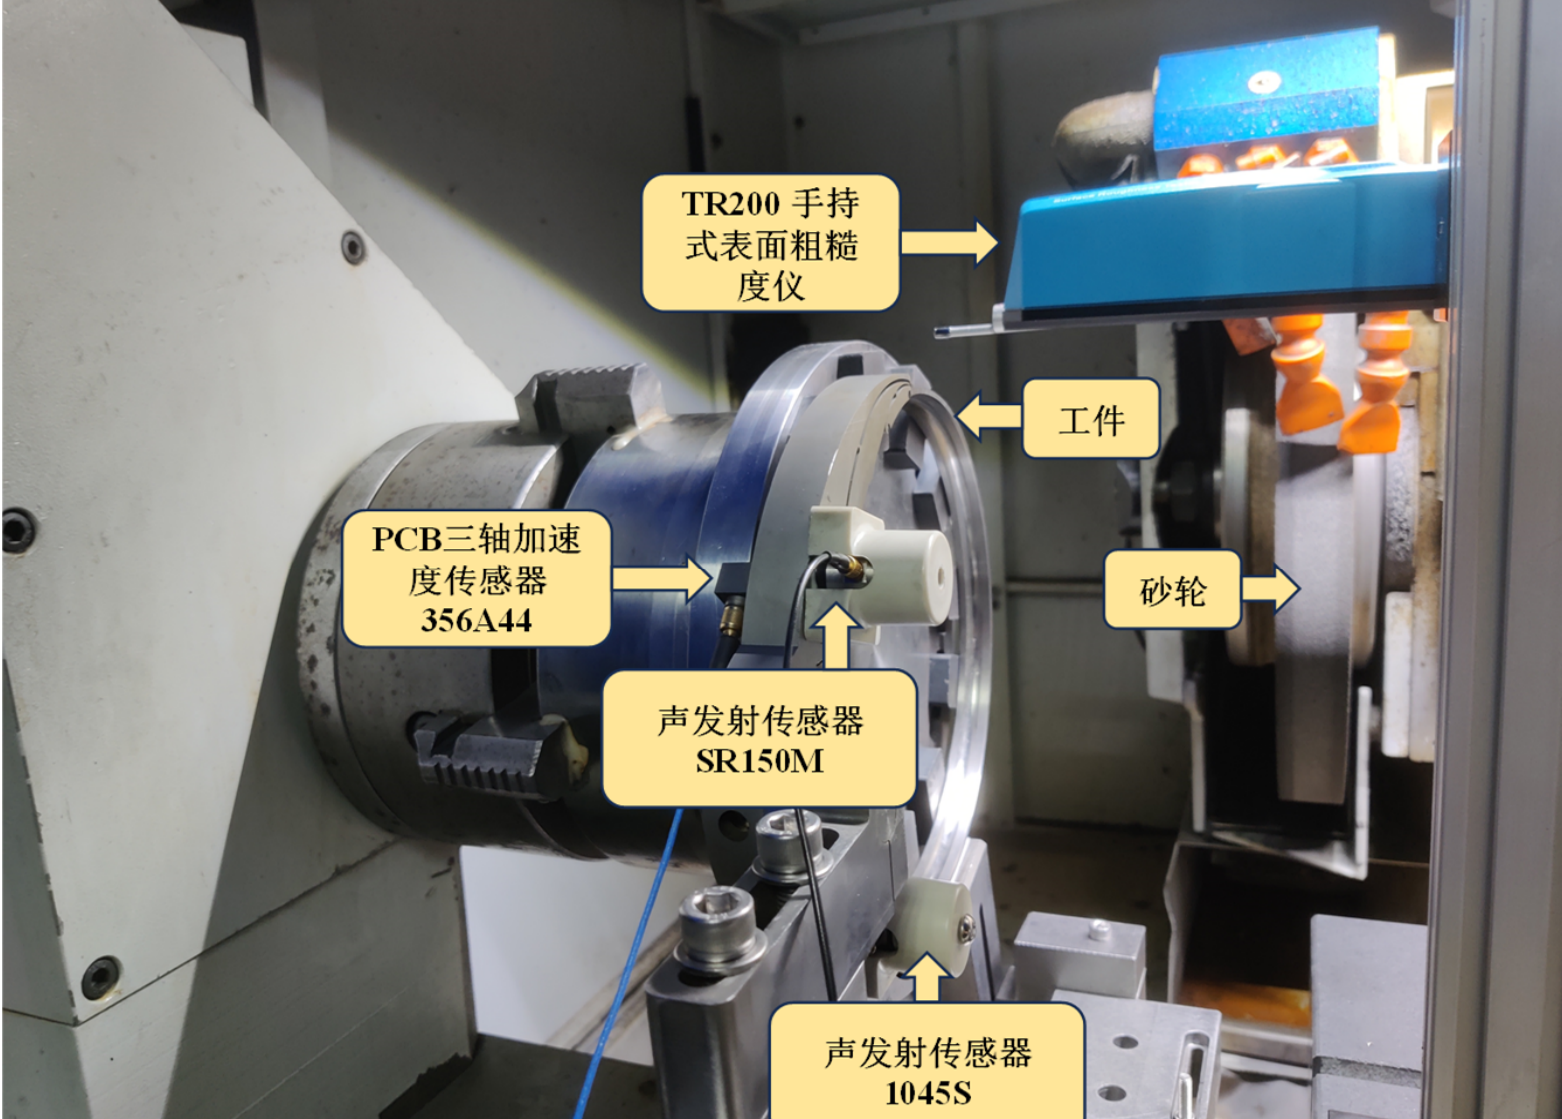

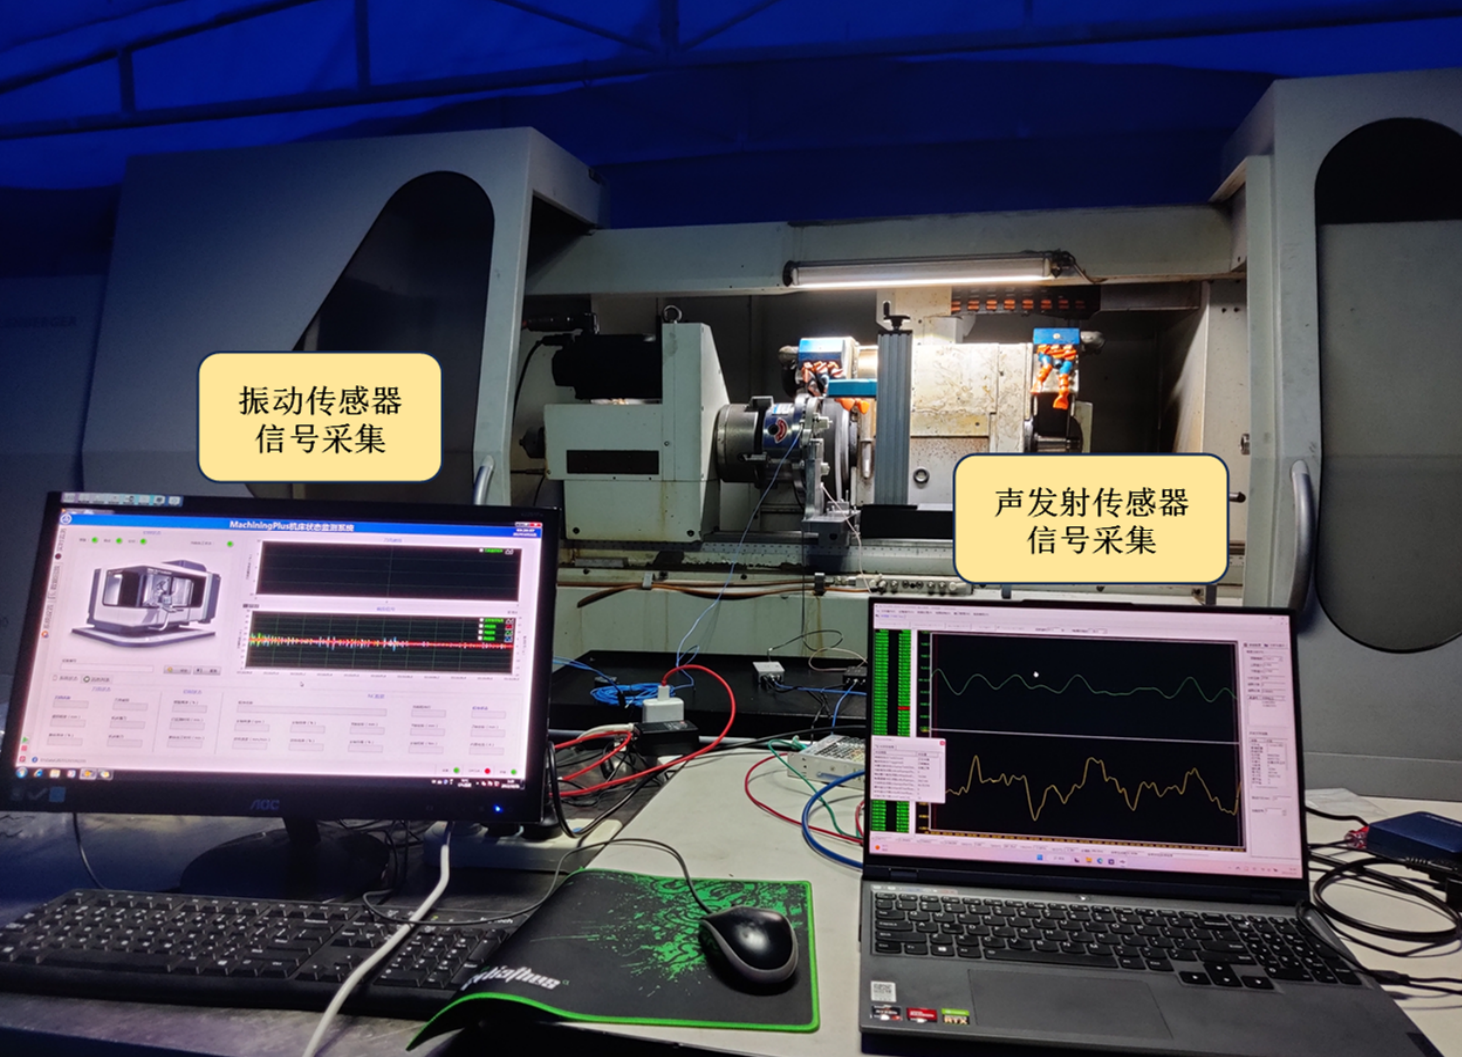

In [2]:
import sys
sys.path.append('./utils')
# from pydub import AudioSegment
import itertools
import string
import glob
import subprocess
import seedir
from utils.preprocessing import print_tdms_structure,check_identical_csv_lengths
from utils.preprocessing import linearSpectrogram, logMelSpectrogram,melSpectrogram, logSpectrogram, standardize_array,slice_indices

alphabet = list(string.ascii_lowercase)
sampling_rate_ae = 4*1e6
sampling_rate_vib = 51.2*1e3

project_name = ["Grinding","XiAnJiaoTong"]

if os.name == 'posix':
    project_dir:str = os.path.join(
    subprocess.getoutput("echo $DATADIR"),
    *project_name,
    )
elif os.name == 'nt':
    project_dir:str = os.path.join(
    subprocess.getoutput("echo %datadir%"),
    *project_name
    )

dataDir_ae = os.path.join(project_dir,"AE")
dataDir_vib = os.path.join(project_dir,"Vibration")

In [3]:
df = pd.read_excel(os.path.join(project_dir,"parameters.xlsx"),index_col=0)
df.columns = ["Surface speed","Workpiece rotation speed","Grinding depth"]
df["Surface speed"] = df["Surface speed"].str.extract(r'(\d+)').astype(float) # mm/s
df["Workpiece rotation speed"] = df["Workpiece rotation speed"].str.extract(r'(\d+)').astype(float) # rpm
df["Grinding depth"] = df["Grinding depth"].str.extract(r'(\d+)').astype(float) # um
parameters = df.copy()
del df
parameters

Surface speed  Workpiece rotation speed  Grinding depth
No.                                                         
1             25.0                      20.0            20.0
2             25.0                      40.0            30.0
3             25.0                      60.0            40.0
4             25.0                      80.0            50.0
5             30.0                      40.0            40.0
6             30.0                      60.0            50.0
7             30.0                      80.0            20.0
8             30.0                      20.0            30.0
9             35.0                      60.0            50.0
10            35.0                      80.0            20.0
11            35.0                      20.0            30.0
12            35.0                      40.0            40.0
13            40.0                      80.0            30.0
14            40.0                      20.0            40.0
15            40.0                      40.0            50.0
16            40.0                      60.0            20.0

In [29]:
df = pd.read_csv(os.path.join(project_dir,"surface roughness.csv"),index_col=None)
df.columns=["Surface roughness"]
sr = df.iloc[:,0].to_numpy()

In [33]:
# create discrete colormap
_cmap = plt.get_cmap('viridis', 16) 

(20,)


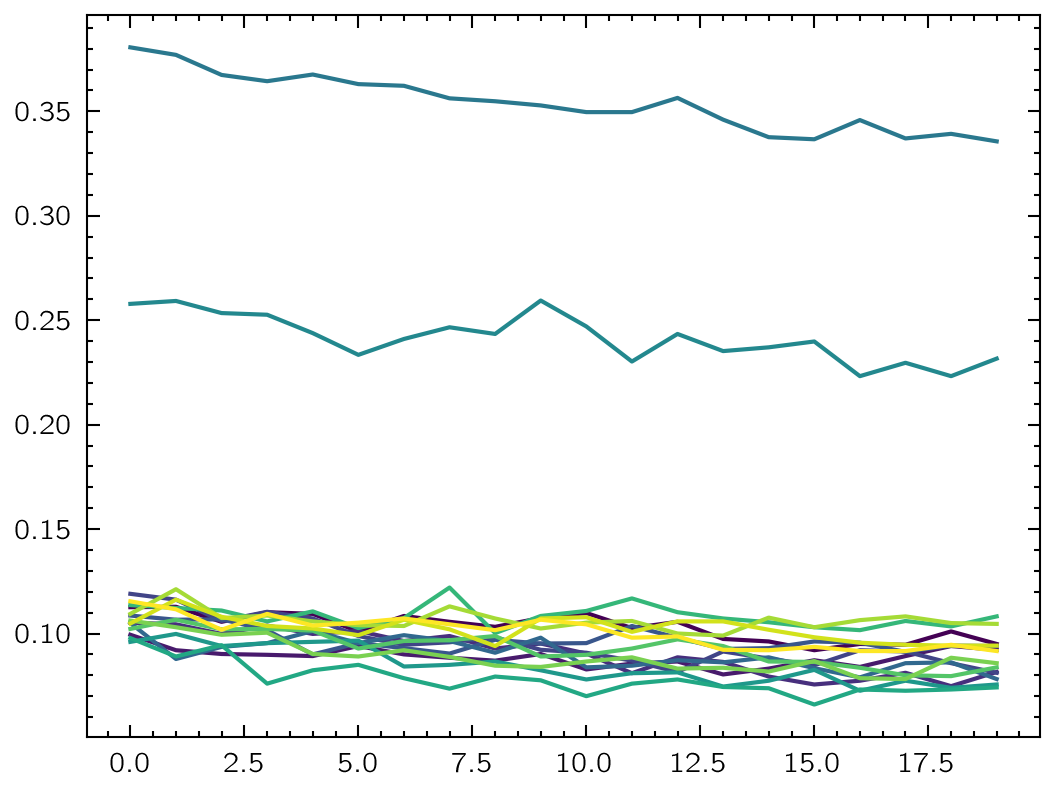

In [45]:
fig,ax = plt.subplots()
for _,i in enumerate(sr.reshape(16,-1)):
    ax.plot(i,c=_cmap(_))
print(i.shape)
plt.show()

In [46]:
# file_names = [os.path.join(dataDir,str(i),f'{i}.TXT') for i in range(1,5)]
# file_names = [os.path.join(dataDir,f'{i}.TXT') for i in range(1,5)]
# sampling_rate = int(50*1e6)

ae_names = natsorted([os.path.join(dataDir_ae,i) for i in os.listdir(dataDir_ae) if os.path.splitext(i)[1] == '.txt'])
ae_names

['C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-01-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-02-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-03-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-04-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-05-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-06-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-07-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-08-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-09-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-10-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-11-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-12-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAn

data_length = check_identical_csv_lengths(dataDir_ae,'txt')

```
File lengths are not identical.
File C:\Users\Public\Documents\Data\Grinding\XiAnJiaoTong\AE\1-02-0.txt has a different length (58605567) than the first file (61194239).
```

## File structure

In [7]:
seedir.seedir(dataDir_ae)

AE/
├─1-01-0.txt
├─1-02-0.txt
├─1-03-0.txt
├─1-04-0.txt
├─1-05-0.txt
├─1-06-0.txt
├─1-07-0.txt
├─1-08-0.txt
├─1-09-0.txt
├─1-10-0.txt
├─1-11-0.txt
├─1-12-0.txt
├─1-13-0.txt
├─1-14-0.txt
├─1-15-0.txt
├─1-16-0.txt
├─1-17-0.txt
├─1-18-0.txt
├─1-19-0.txt
├─1-20-0.txt
├─10-01-0.txt
├─10-02-0.txt
├─10-03-0.txt
├─10-04-0.txt
├─10-05-0.txt
├─10-06-0.txt
├─10-07-0.txt
├─10-08-0.txt
├─10-09-0.txt
├─10-10-0.txt
├─10-11-0.txt
├─10-12-0.txt
├─10-13-0.txt
├─10-14-0.txt
├─10-15-0.txt
├─10-16-0.txt
├─10-17-0.txt
├─10-18-0.txt
├─10-19-0.txt
├─10-20-0.txt
├─11-01-0.txt
├─11-02-0.txt
├─11-03-0.txt
├─11-04-0.txt
├─11-05-0.txt
├─11-06-0.txt
├─11-07-0.txt
├─11-08-0.txt
├─11-09-0.txt
├─11-10-0.txt
├─11-11-0.txt
├─11-12-0.txt
├─11-13-0.txt
├─11-14-0.txt
├─11-15-0.txt
├─11-16-0.txt
├─11-17-0.txt
├─11-18-0.txt
├─11-19-0.txt
├─11-20-0.txt
├─12-01-0.txt
├─12-02-0.txt
├─12-03-0.txt
├─12-04-0.txt
├─12-05-0.txt
├─12-06-0.txt
├─12-07-0.txt
├─12-08-0.txt
├─12-09-0.txt
├─12-10-0.txt
├─12-11-0.txt
├─12-12-0.txt
├─12-13-

## Data structure

In [ ]:
df = pd.read_csv(ae_names[0],sep='\s',header=None)
df.head()

C:\Users\mingwucn\AppData\Local\Temp\ipykernel_46836\2372502461.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(ae_names[0],sep='\s',header=None)


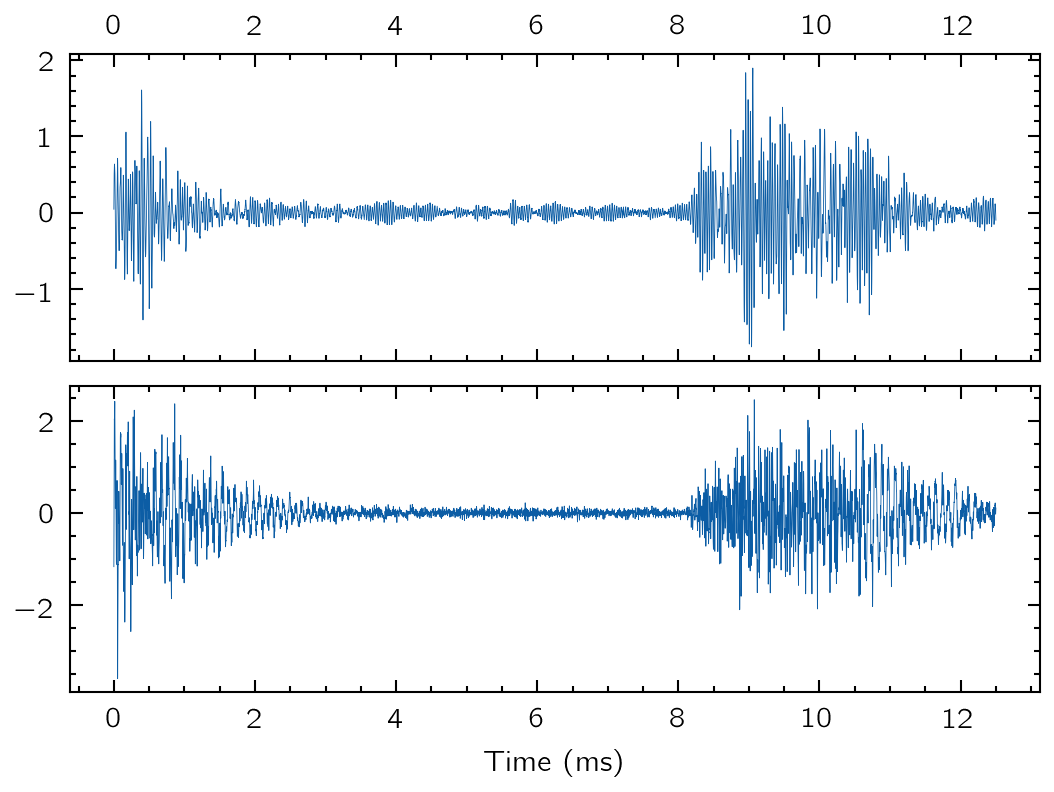

In [7]:
_data0 = df[0][:50000].to_numpy() # Narrowband Acoustic Emission Signal
_data1 = df[1][:50000].to_numpy() # Broadband Acoustic Emission Signal
_t = np.linspace(0,len(_data0)/sampling_rate_ae*1e3,len(_data0))
fig,ax = plt.subplots(nrows=2,ncols=1)
ax[0].plot(_t,_data0,lw=0.2)
ax[1].plot(_t,_data1,lw=0.2)
ax[0].tick_params(direction = 'in',top=True,labeltop=True,labelbottom=False)
ax[1].set_xlabel('Time (ms)')
# ax[0].set_xlabel('Time (ms)')
plt.show()

In [8]:
# Fourier Transform
from scipy.fft import fft, fftfreq
N = len(_data0)
T = 1.0 / sampling_rate_ae
yf = fft(_data0)
xf = fftfreq(N, T)[:N//2]

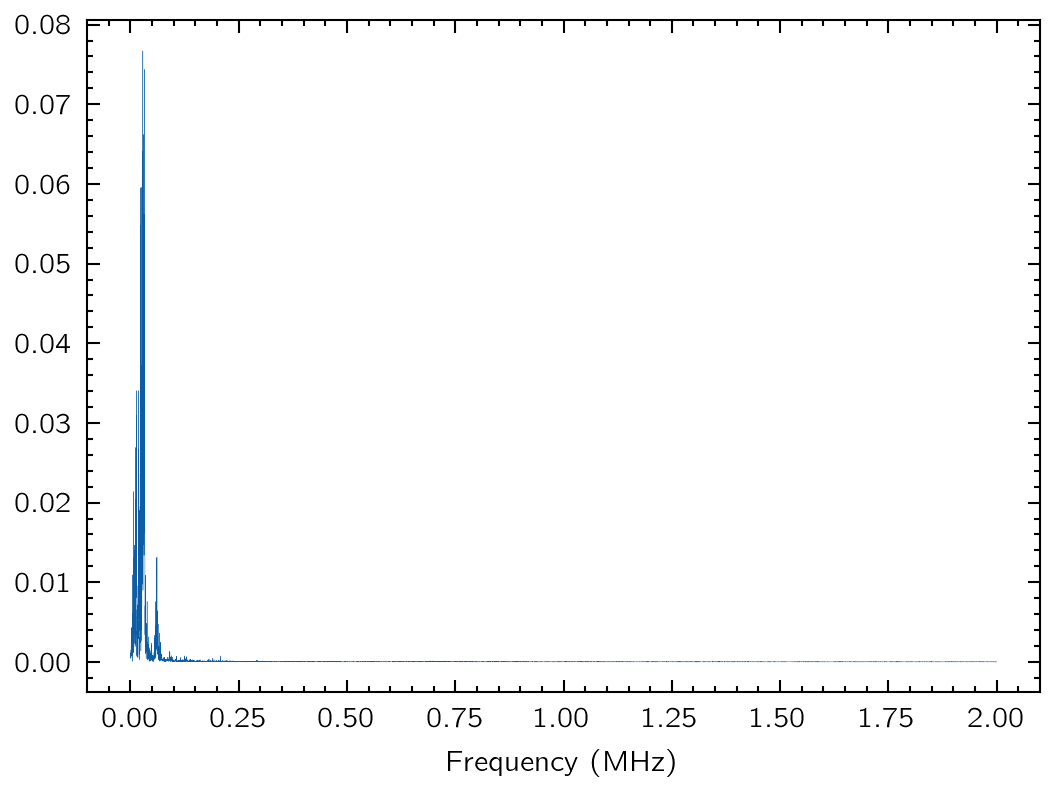

In [9]:
fig,ax = plt.subplots()
ax.plot(xf*1e-6, 2.0/N * np.abs(yf[0:N//2]),lw=0.1)
ax.set_xlabel('Frequency (MHz)')
# ax.set_ylabel('Amplitude')
plt.show()

In [10]:
_data0 = df[0][:].to_numpy()
_data1 = df[1][:].to_numpy()

In [11]:
plt.rcParams['figure.autolayout'] = True
# Spec_Liner = linearSpectrogram(data = _data0,sampling_rate=sampling_rate_ae,display=True)
# Spec_Mel = melSpectrogram(data=_data0,sampling_rate=sampling_rate_ae,display=True)
# Spec_LogLiner = logSpectrogram(data=_data0,sampling_rate=sampling_rate_ae,display=True)
# Spec_LogMelLiner = logMelSpectrogram(data=_data0,sampling_rate=sampling_rate_ae,display=True)

In [134]:
n_fft = 1024
hop_length = 320
window_type = 'hann'
mel_bins=256
def log_liner_plot(data,save=False,show=True,ylim=0.50*1e6,func = logSpectrogram,n_fft=n_fft,hop_length=hop_length,window_type=window_type,sampling_rate=sampling_rate_ae):
    Spec_LogLiner = func(data=data,sampling_rate=sampling_rate,display=False,n_fft=n_fft,hop_length=hop_length,window_type=window_type)
    print(Spec_LogLiner.shape)
    fig,ax = plt.subplots(figsize=(6.8,2.625))
    img = librosa.display.specshow(Spec_LogLiner,sr=sampling_rate,x_axis='time',y_axis='linear',n_fft=n_fft,hop_length=hop_length)
    # ax.set_ylim(-1953.125, 2001953.125)
    ax.set_ylim(-1.125, ylim)
    cbar = plt.colorbar(format="%+2.0f dB")
    cbar.ax.minorticks_off() 
    yticks = ax.get_yticks()
    ax.set_yticklabels([f"{int(y/1000)}" for y in yticks])  # Divide by 1000 and format as kHz
    ax.set_ylabel(" ")
    ax.set_xlabel(" ")
    if save != False:
        plt.savefig(save, dpi=300)
    if show == False:
        plt.close()
    else:
        plt.show()
    return Spec_LogLiner

def mel_plot(data,save=False,show=True,ylim=0.50*1e6,func = melSpectrogram,mel_bins=256,n_fft=n_fft,hop_length=hop_length,window_type=window_type):
    Spec = func(data=data,sampling_rate=sampling_rate_ae,display=False,n_fft=n_fft,hop_length=hop_length,window_type=window_type,mel_bins=mel_bins)
    print(Spec.shape)
    fig,ax = plt.subplots(figsize=(6.8,2.625))
    img = librosa.display.specshow(Spec,sr=sampling_rate_ae,x_axis='time',y_axis='linear',n_fft=n_fft,hop_length=hop_length)
    # ax.set_ylim(-1953.125, 2001953.125)
    ax.set_ylim(-1.125, ylim)
    cbar = plt.colorbar(format="%+2.0f dB")
    cbar.ax.minorticks_off() 
    yticks = ax.get_yticks()
    ax.set_yticklabels([f"{int(y/1000)}" for y in yticks])  # Divide by 1000 and format as kHz
    ax.set_ylabel(" ")
    ax.set_xlabel(" ")
    if save != False:
        plt.savefig(save, dpi=300)
    if show == False:
        plt.close()
    else:
        plt.show()
    return Spec

(257, 6251)


C:\Users\mingwucn\AppData\Local\Temp\ipykernel_43244\110624401.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(y/1000)}" for y in yticks])  # Divide by 1000 and format as kHz


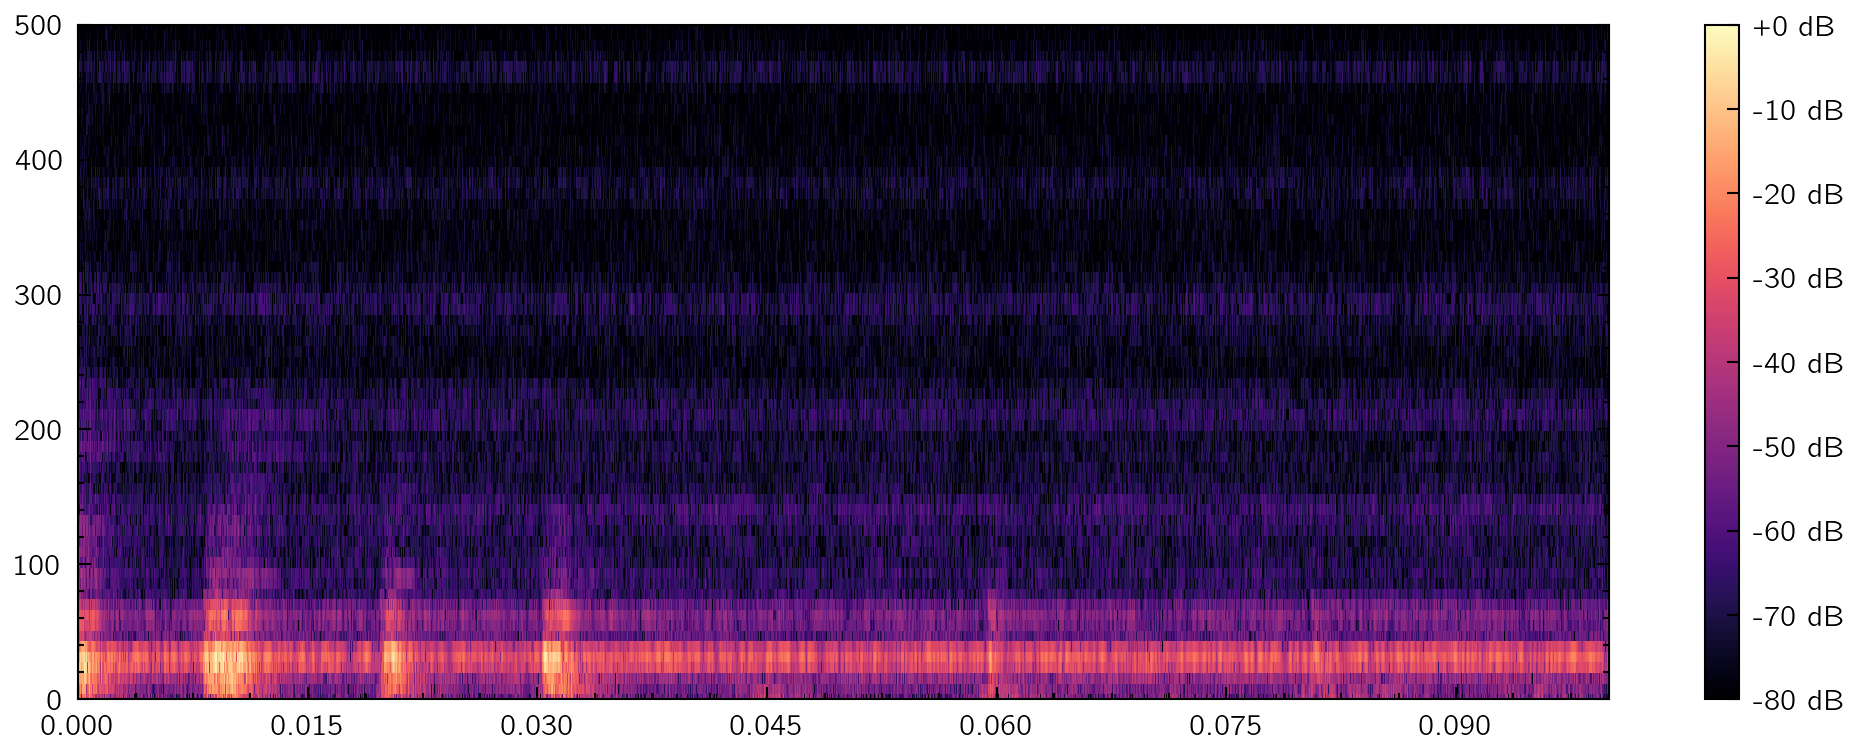

(257, 6251)


C:\Users\mingwucn\AppData\Local\Temp\ipykernel_43244\110624401.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(y/1000)}" for y in yticks])  # Divide by 1000 and format as kHz


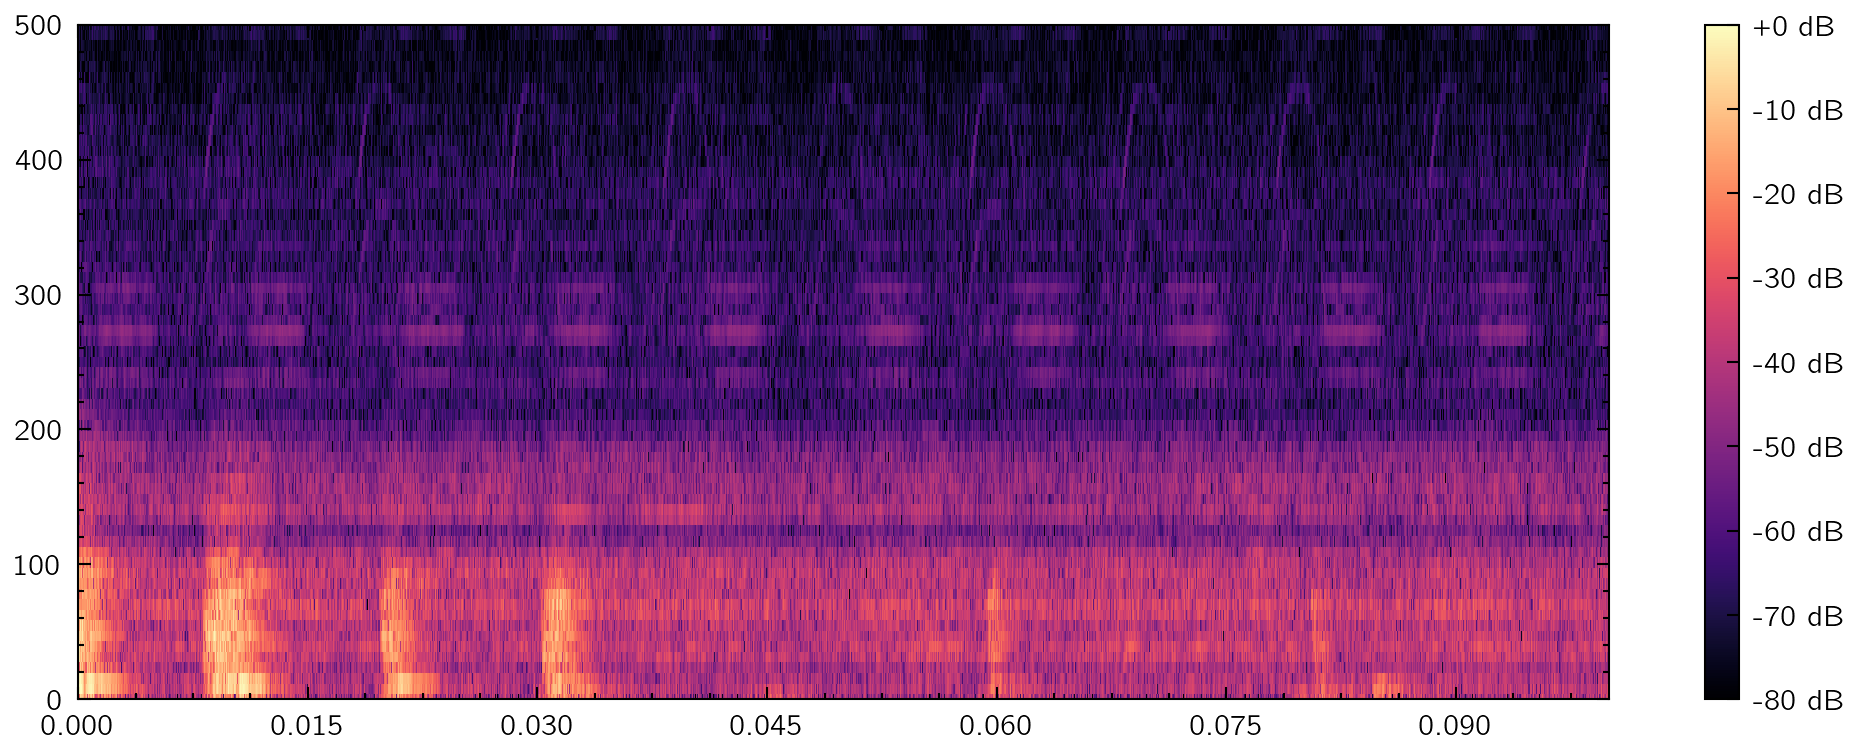

In [47]:
n_fft = 512
hop_length = n_fft//8
window_type = 'hann'
mel_bins=256

spec_broads = []
spec_narrows = []
for _ae_name in (ae_names[:1]):
    # df = pd.read_csv(_ae_name,sep='\s',header=None)
    # fname = os.path.split(_ae_name)[1].split(".")[0]

    _data0 = df[0][:].to_numpy()[:int(sampling_rate_ae*0.1)]
    _data1 = df[1][:].to_numpy()[:int(sampling_rate_ae*0.1)]
    spec_narrow = log_liner_plot(data = _data0, show=True,n_fft=n_fft,hop_length=hop_length,window_type=window_type)
    spec_broad = log_liner_plot(data = _data1, show=True,n_fft=n_fft,hop_length=hop_length,window_type=window_type)

    # spec_narrow = log_liner_plot(data = _data0, save=os.path.join("Grinding Fusion", "images",f"raw_{fname}_mel_narrowband.png"),show=True,ylim=0.40*1e6)
    # spec_broad = log_liner_plot(data = _data1, save=os.path.join("Grinding Fusion", "images",f"raw_{fname}_mel_broadband.png"),show=True,ylim=1.00*1e6)

    spec_broads.append(spec_broad)
    spec_narrows.append(spec_narrow)

C:\Users\mingwucn\AppData\Local\Temp\ipykernel_29572\1962505619.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(_ae_name,sep='\s',header=None)


(513, 191233)


C:\Users\mingwucn\AppData\Local\Temp\ipykernel_29572\3556796272.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(y/1000)}" for y in yticks])  # Divide by 1000 and format as kHz


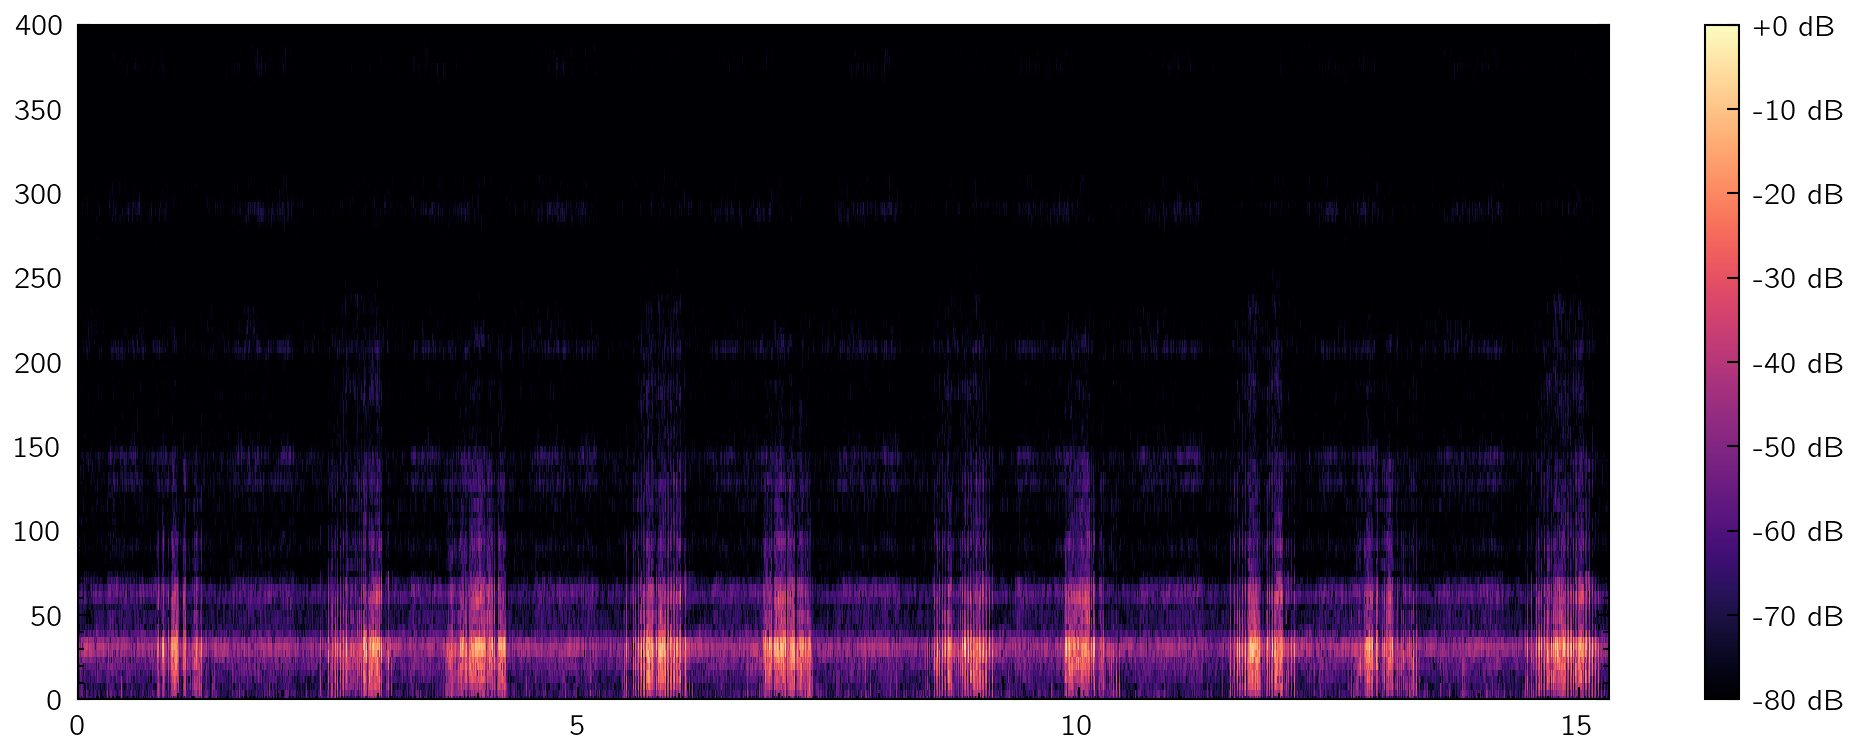

(513, 191233)


C:\Users\mingwucn\AppData\Local\Temp\ipykernel_29572\3556796272.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(y/1000)}" for y in yticks])  # Divide by 1000 and format as kHz


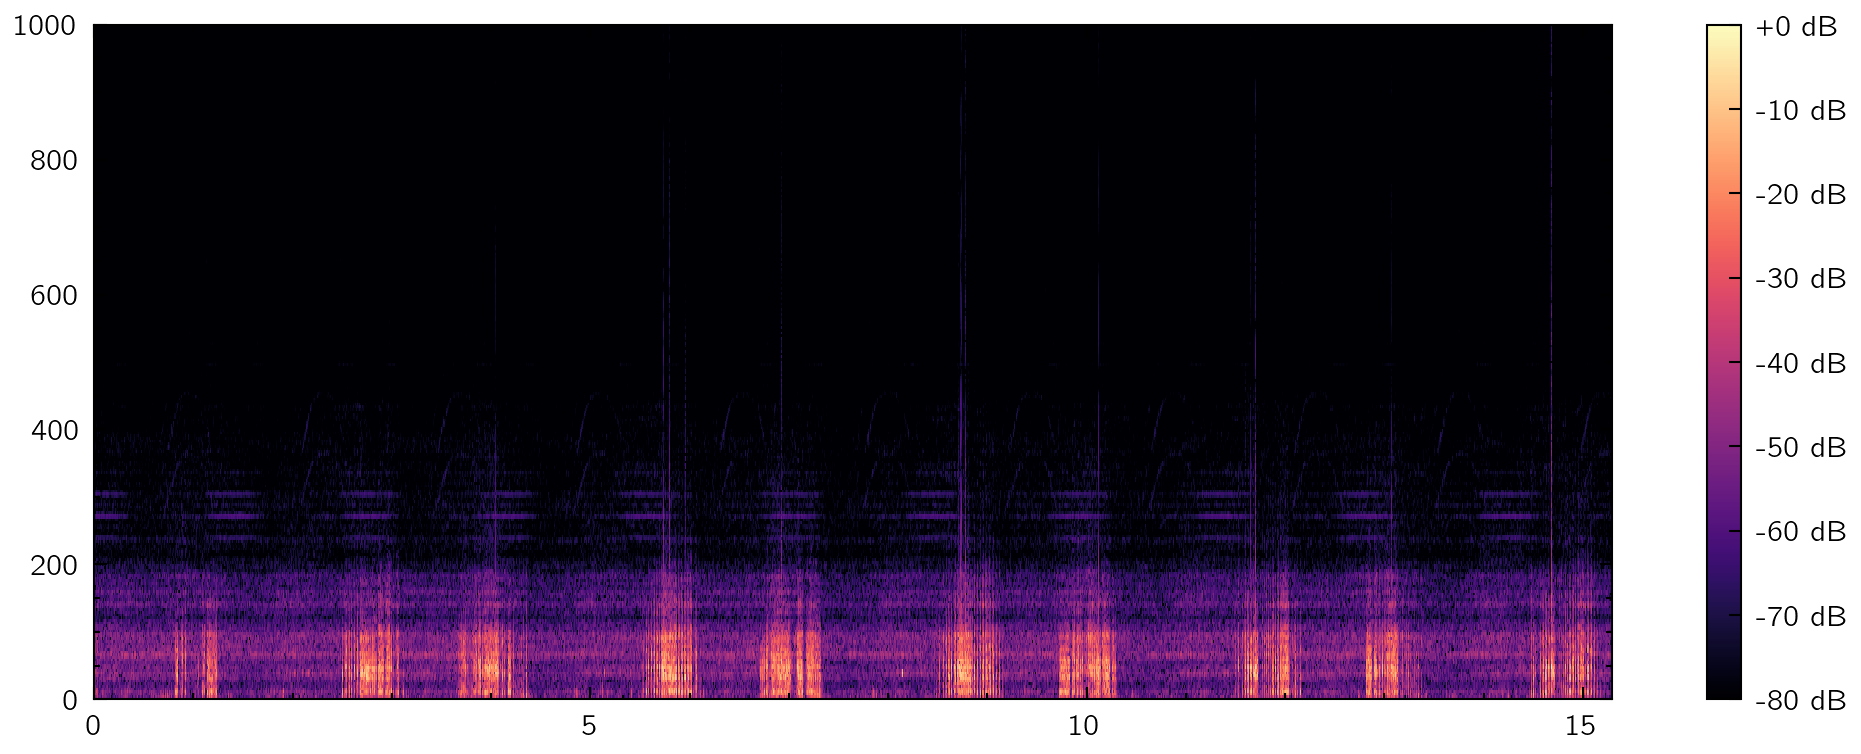

In [13]:
spec_broads = []
spec_narrows = []
for _ae_name in (ae_names[:1]):
    df = pd.read_csv(_ae_name,sep='\s',header=None)
    fname = os.path.split(_ae_name)[1].split(".")[0]

    _data0 = df[0][:].to_numpy()
    _data1 = df[1][:].to_numpy()
    spec_narrow = log_liner_plot(data = _data0, save=os.path.join("Grinding Fusion", "images",f"raw_{fname}_mel_narrowband.png"),show=True,ylim=0.40*1e6)
    spec_broad = log_liner_plot(data = _data1, save=os.path.join("Grinding Fusion", "images",f"raw_{fname}_mel_broadband.png"),show=True,ylim=1.00*1e6)

    spec_broads.append(spec_broad)
    spec_narrows.append(spec_narrow)

In [14]:
spec = logMelSpectrogram(data = _data0,mel_bins=512,sampling_rate=sampling_rate_ae)

c:\Users\mingwucn\.conda\envs\ai\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


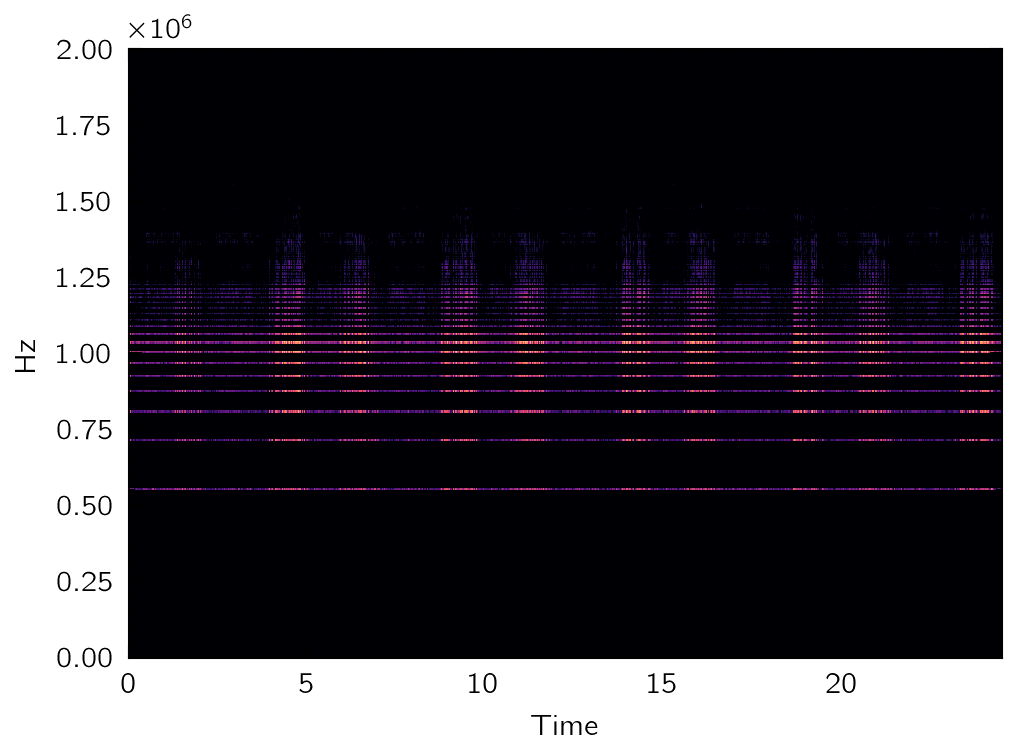

In [16]:
img = librosa.display.specshow(spec,sr=sampling_rate_ae,x_axis='time',y_axis='linear')

In [38]:
def process_ae(ae_signal, fs=4e6):
    """Extract narrowband (150-250kHz) features from 4MHz AE data."""
    # Wavelet energy in fracture-sensitive band
    coeffs, freqs = pywt.cwt(ae_signal, np.arange(1, 100), 'cmor3-3', sampling_period=1/fs)
    mask = (freqs > 150e3) & (freqs < 250e3)
    wavelet_energy = np.sum(coeffs[mask]**2)
    
    # Burst detection (threshold = 4σ)
    threshold = 4 * np.std(ae_signal)
    peaks, _ = find_peaks(ae_signal, height=threshold, distance=int(fs*1e-4))  # 0.1ms min spacing
    burst_rate = len(peaks) / (len(ae_signal)/fs)
    
    return {'wavelet_energy': wavelet_energy, 'burst_rate': burst_rate}

In [68]:
from scipy.signal import welch, find_peaks
import pywt
ae_info = process_ae(_data0)
np.abs(ae_info['wavelet_energy']), ae_info['burst_rate']

(0.7031572387839405, 310.0)

In [69]:
ae_info = process_ae(_data1)
np.abs(ae_info['wavelet_energy']), ae_info['burst_rate']

(22.913179125026023, 460.0)

In [ ]:
fo = slice_indices(len(df), int(sampling_rate_ae*0.01), 0.0)[-1]

### Read vibration

In [80]:
seedir.seedir(dataDir_vib)

Vibration/
├─1-01/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-02/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-03/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-04/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-05/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-06/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-07/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-08/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-09/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-10/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-11/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-12/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-13/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-14/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-15/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-16/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-17/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-18/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├─1-19/
│ ├─Test_Data.tdms
│ └─Test_Data.tdms_index
├

In [89]:
vib_data = TdmsFile.read(os.path.join(dataDir_vib,f"1-01","Test_Data.tdms")).groups()

In [106]:
vib_x = vib_data[0].channels()[0].data[:]
vib_y = vib_data[0].channels()[1].data[:]
vib_z = vib_data[0].channels()[2].data[:]

In [127]:
_c = vib_data[0].channels()[0]

X轴振动


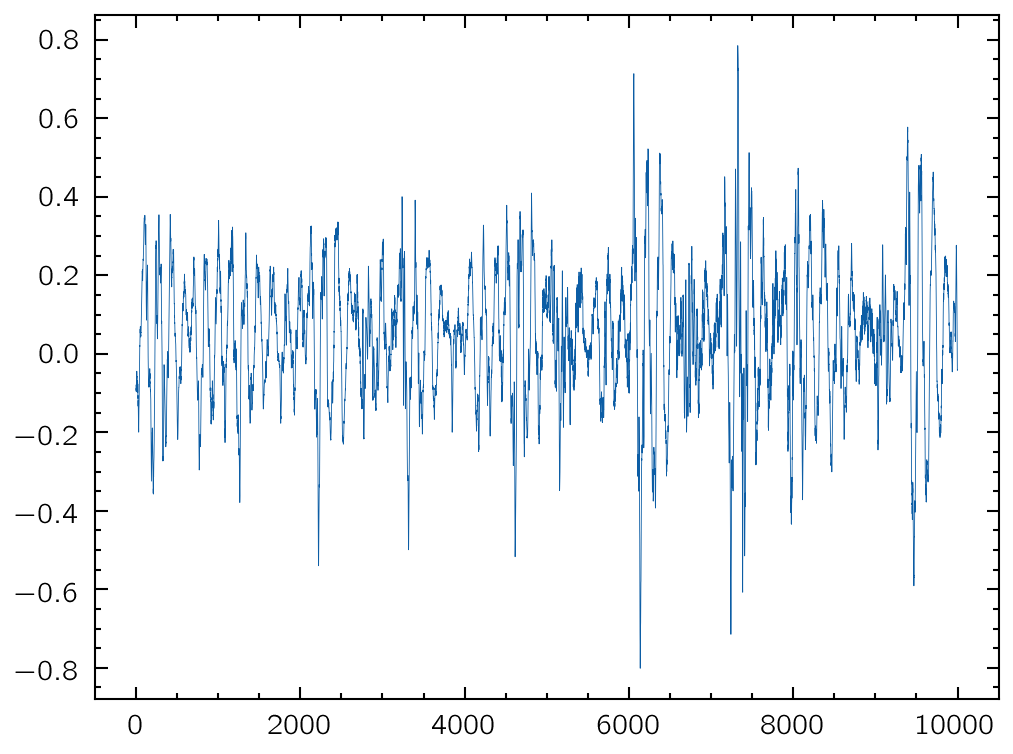

Y轴振动


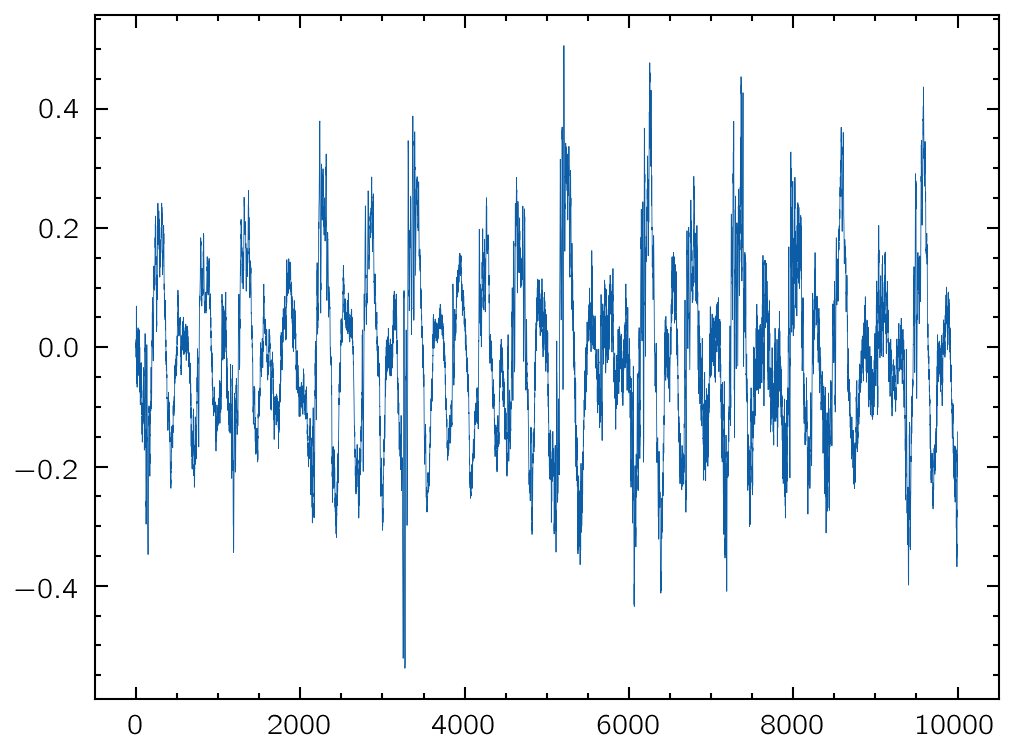

Z轴振动


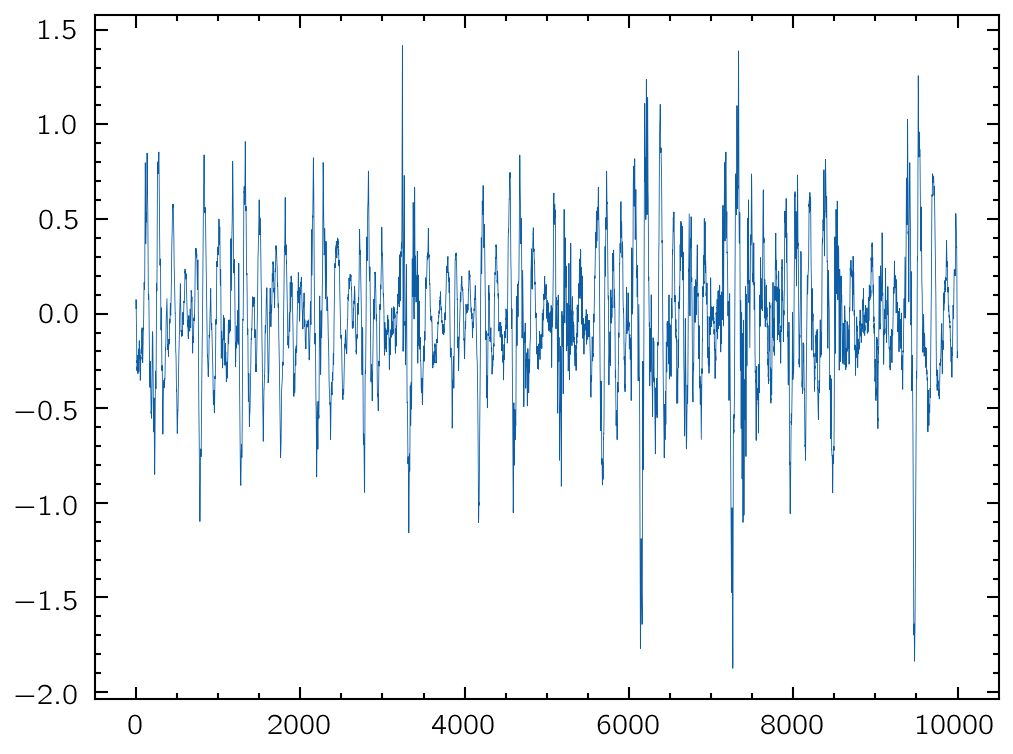

AI3


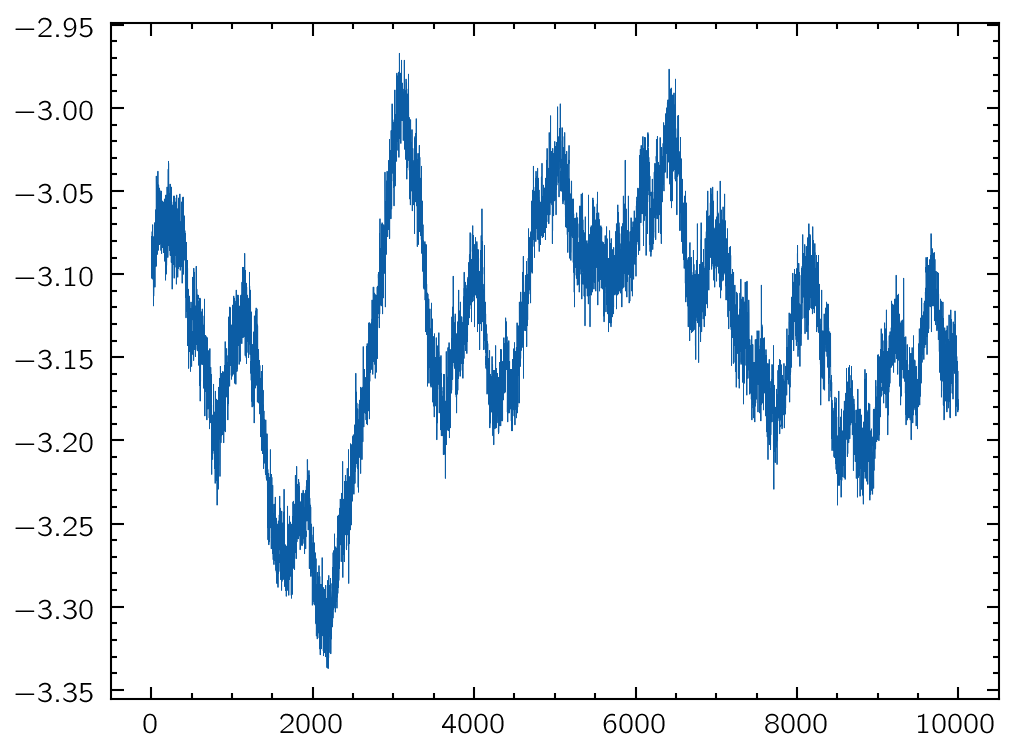

U相电流


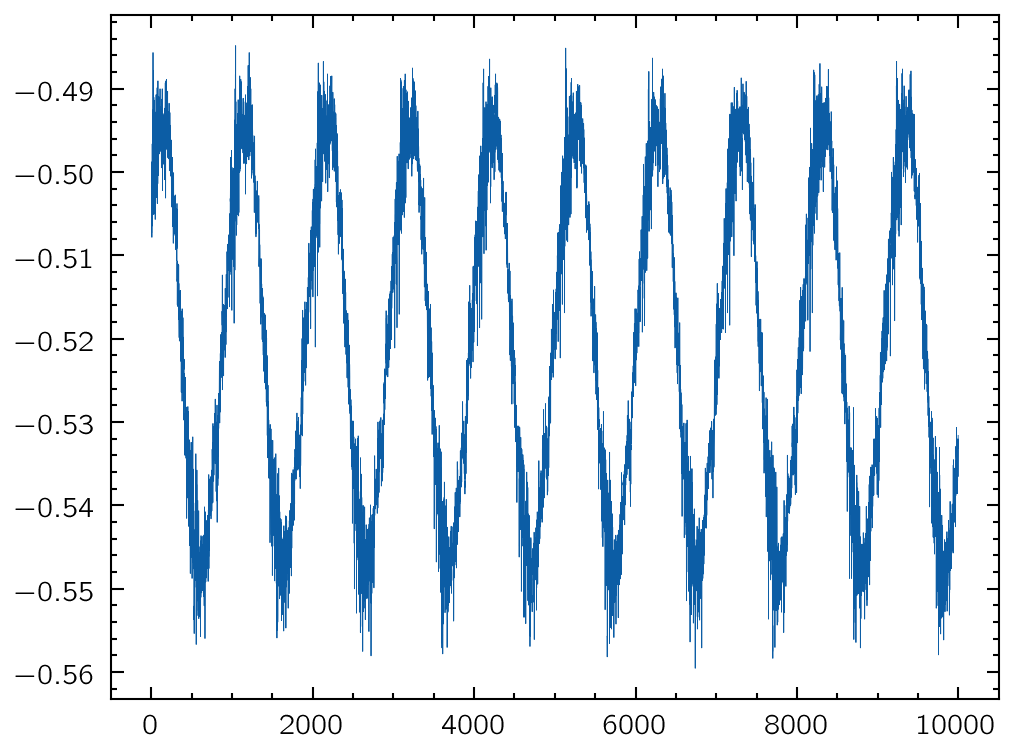

V相电流


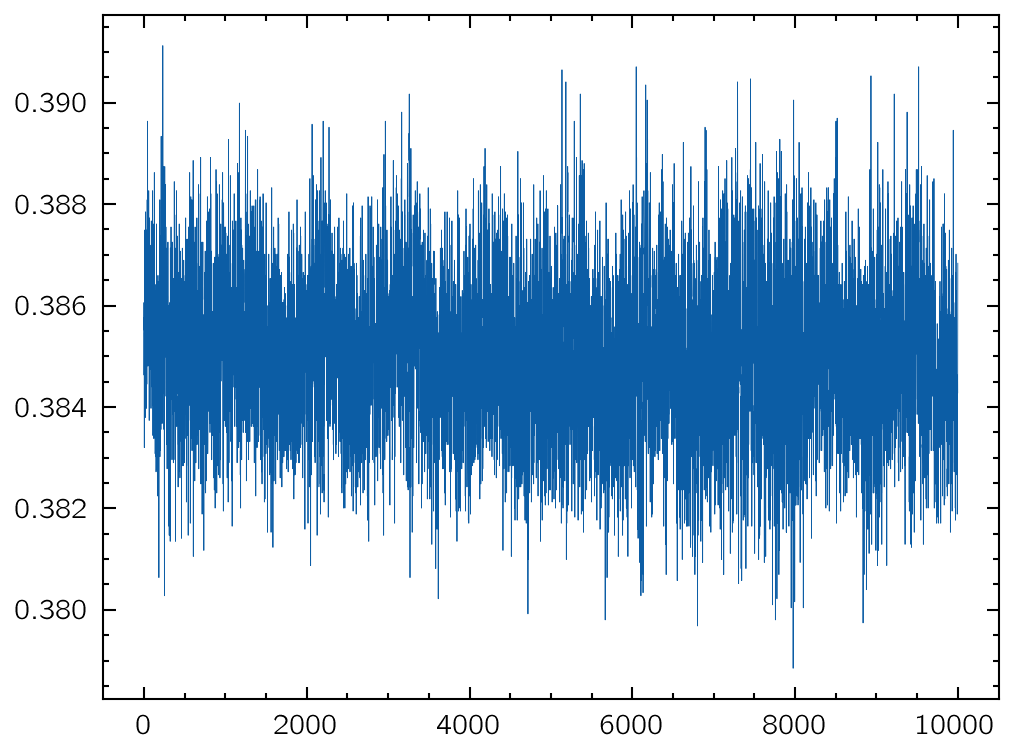

W相电流


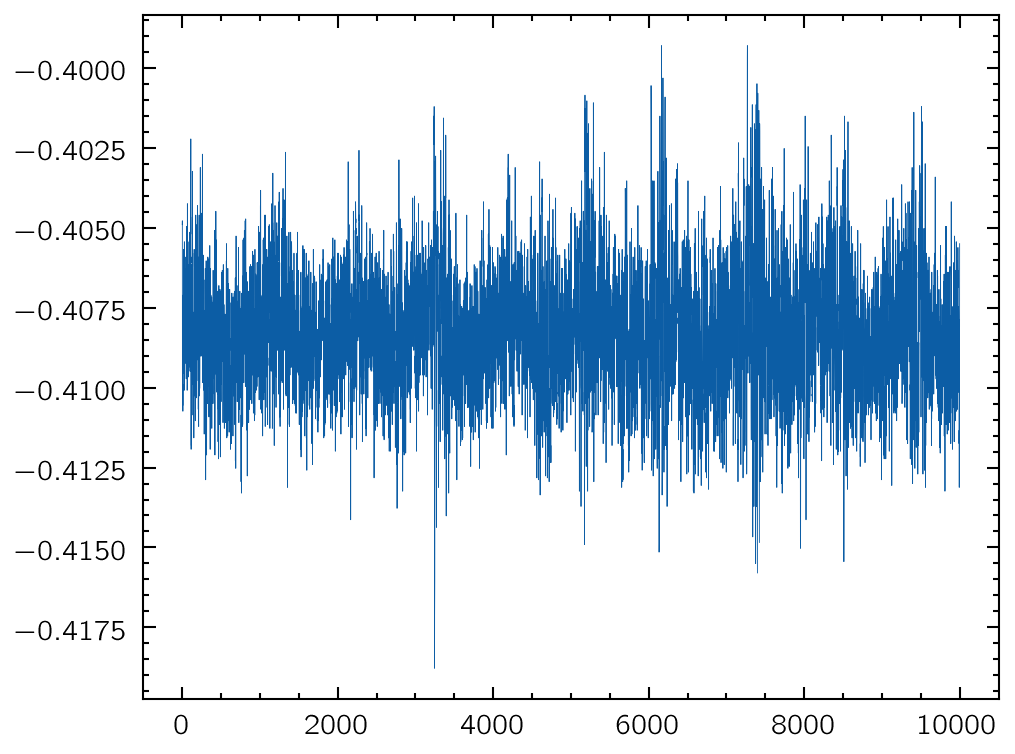

AI7


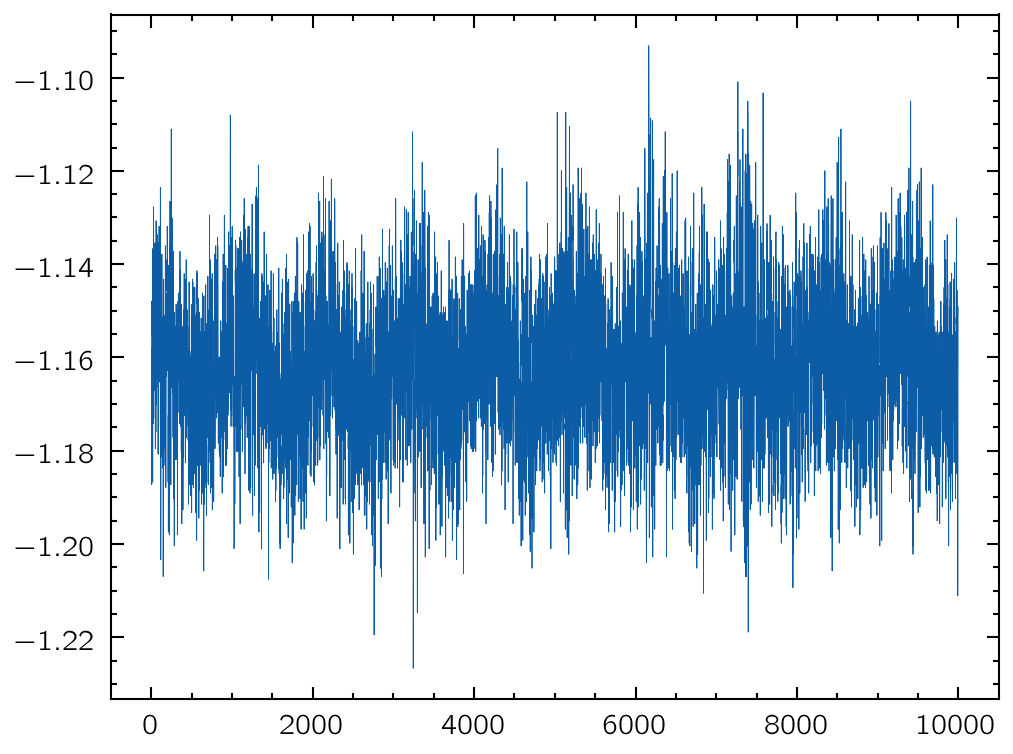

有效值电流


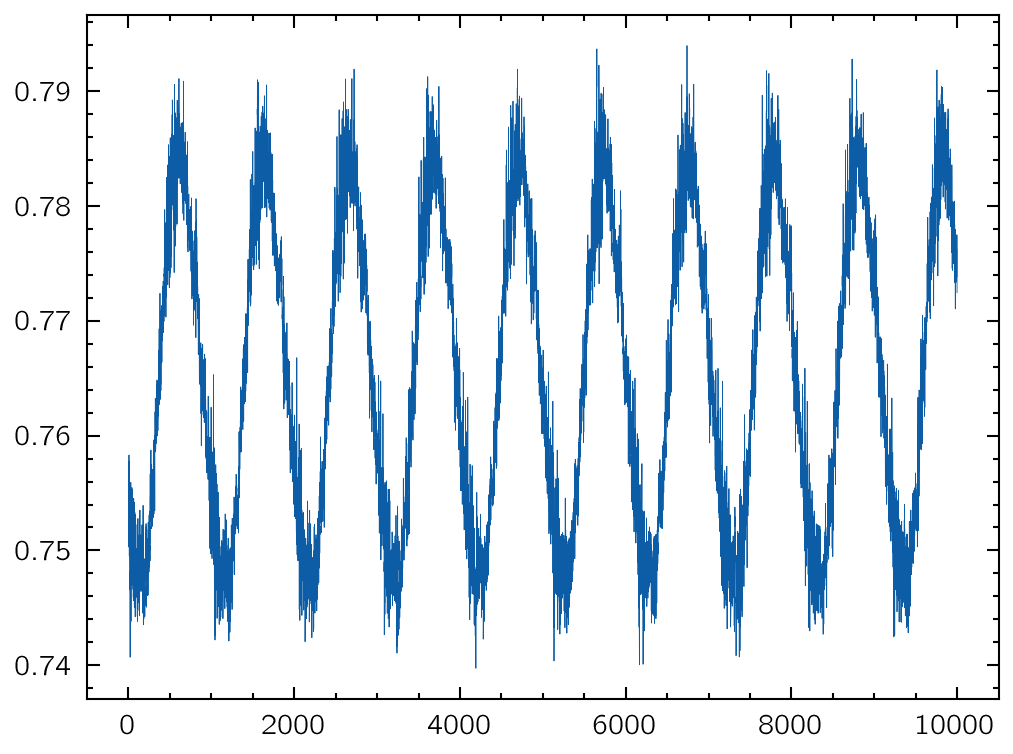

In [130]:
# plot vibration data for each channels
for i in range(len(vib_data[0].channels())):
    print(vib_data[0].channels()[i].name)
    fig,ax = plt.subplots()
    ax.plot(vib_data[0].channels()[i].data[:10000],lw=0.2)
    plt.show()

In [ ]:
vib_x

array([-0.07980137, -0.08379084, -0.09366954, ...,  0.21708204,
        0.22561904,  0.21462424])

(257, 81)


C:\Users\mingwucn\AppData\Local\Temp\ipykernel_43244\285780998.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(y/1000)}" for y in yticks])  # Divide by 1000 and format as kHz


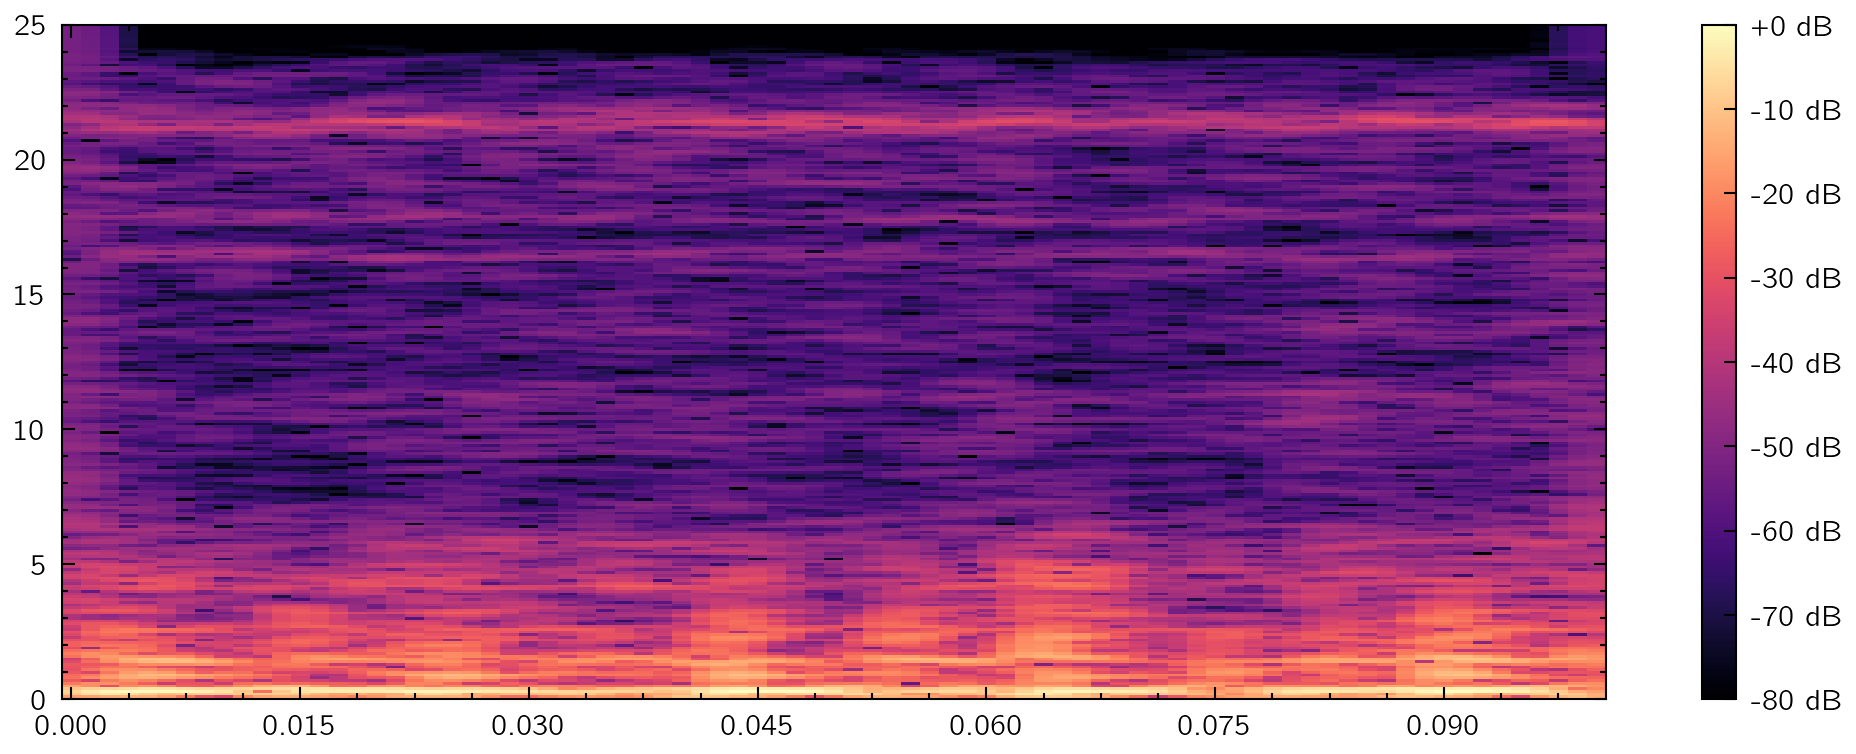

(257, 81)


C:\Users\mingwucn\AppData\Local\Temp\ipykernel_43244\285780998.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(y/1000)}" for y in yticks])  # Divide by 1000 and format as kHz


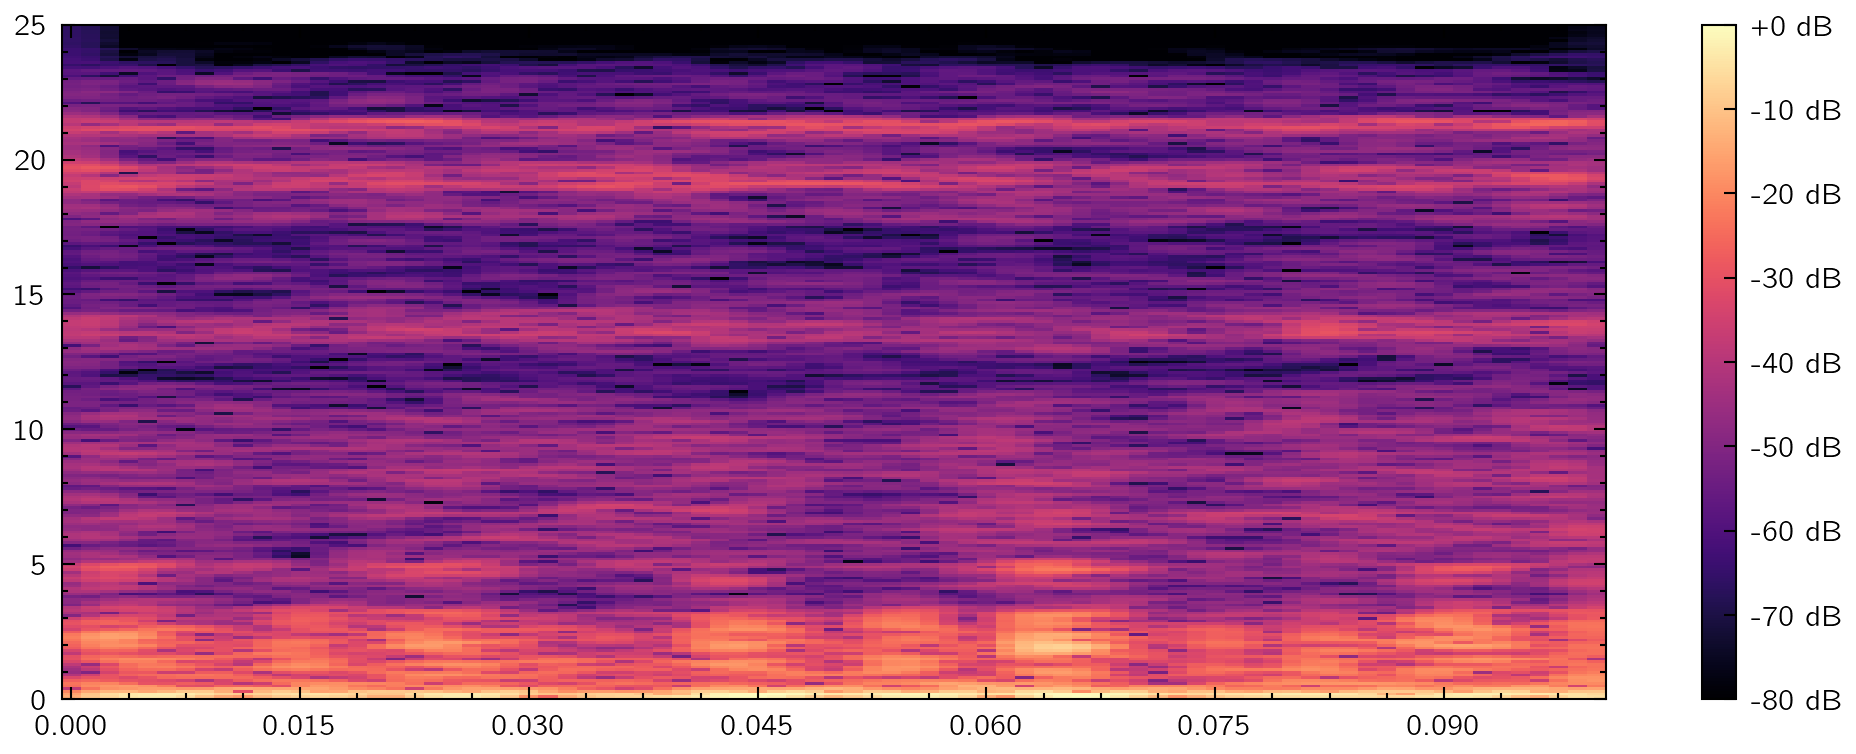

(257, 81)


C:\Users\mingwucn\AppData\Local\Temp\ipykernel_43244\285780998.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(y/1000)}" for y in yticks])  # Divide by 1000 and format as kHz


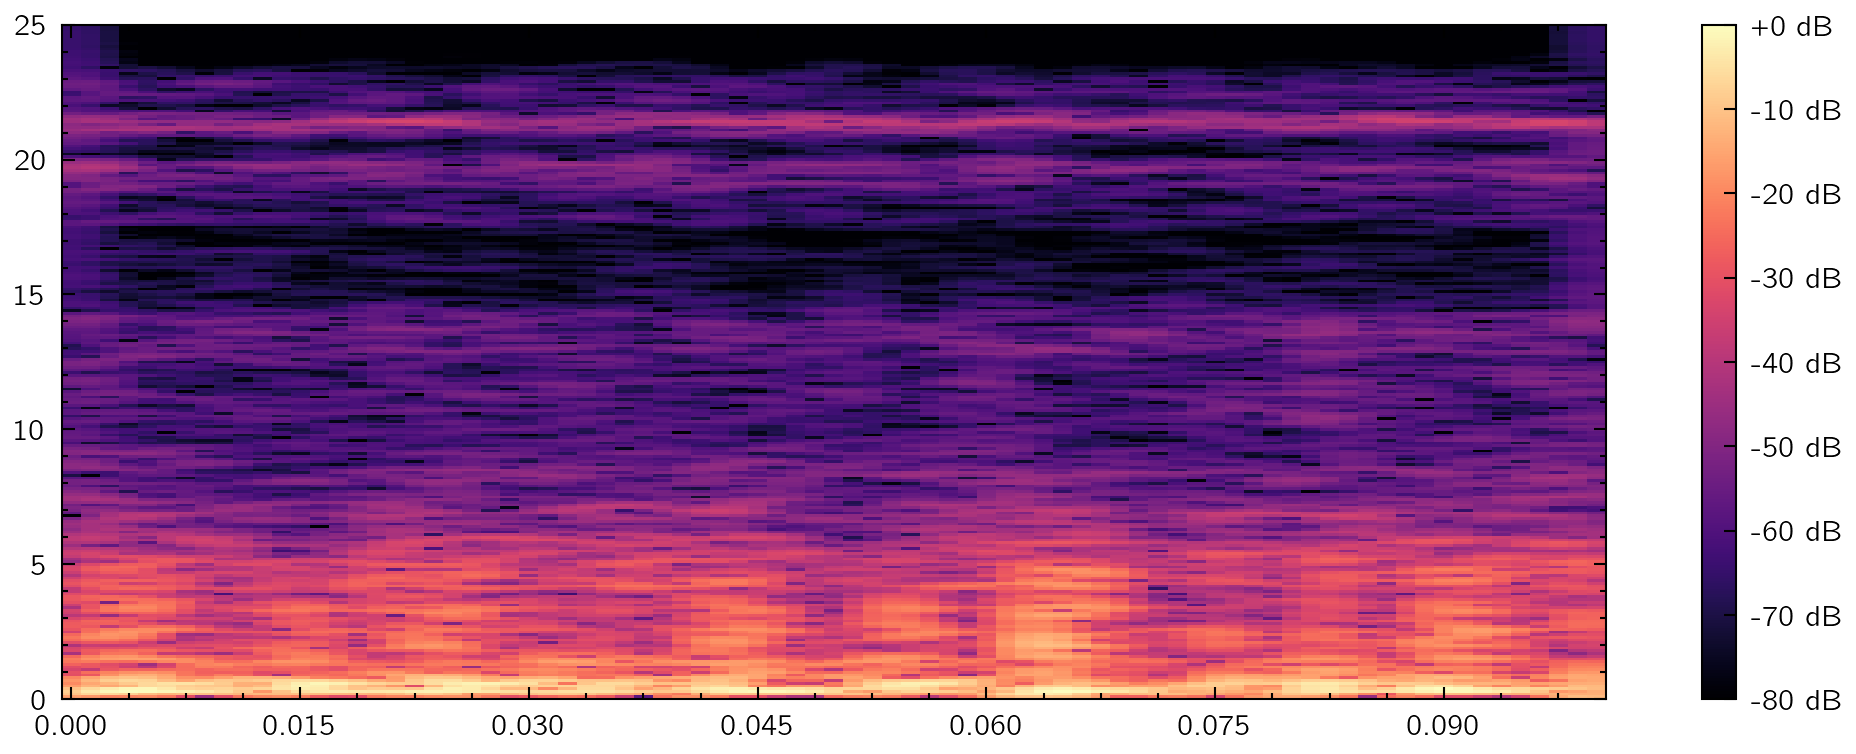

In [ ]:
n_fft = 512
hop_length = n_fft//8
window_type = 'hann'
mel_bins=256

spec_broads = []
spec_narrows = []
for _ae_name in (ae_names[:1]):
    # df = pd.read_csv(_ae_name,sep='\s',header=None)
    # fname = os.path.split(_ae_name)[1].split(".")[0]

    # _data0 = df[0][:].to_numpy()[:int(sampling_rate_ae*0.1)]
    # _data1 = df[1][:].to_numpy()[:int(sampling_rate_ae*0.1)]
    spec_x = log_liner_plot(data = vib_x[:int(sampling_rate_vib*0.1)],ylim=1.25*1e5, sampling_rate=sampling_rate_vib,show=True,n_fft=n_fft,hop_length=hop_length,window_type=window_type)
    spec_y = log_liner_plot(data = vib_y[:int(sampling_rate_vib*0.1)],ylim=0.25*1e5, sampling_rate=sampling_rate_vib,show=True,n_fft=n_fft,hop_length=hop_length,window_type=window_type)
    spec_z = log_liner_plot(data = vib_z[:int(sampling_rate_vib*0.1)],ylim=0.25*1e5, sampling_rate=sampling_rate_vib,show=True,n_fft=n_fft,hop_length=hop_length,window_type=window_type)

    # spec_narrow = log_liner_plot(data = _data0, save=os.path.join("Grinding Fusion", "images",f"raw_{fname}_mel_narrowband.png"),show=True,ylim=0.40*1e6)
    # spec_broad = log_liner_plot(data = _data1, save=os.path.join("Grinding Fusion", "images",f"raw_{fname}_mel_broadband.png"),show=True,ylim=1.00*1e6)

    spec_broads.append(spec_broad)
    spec_narrows.append(spec_narrow)

In [146]:
from fusion import process_vibration
from scipy.signal import hilbert, welch

In [148]:
def process_vibration(vib_signal, v_s, fs=51.2e3):
    """Analyze wheel-workpiece dynamics for thin-walled bushing."""
    # Envelope analysis (2-5kHz band)
    analytic = hilbert(vib_signal)
    envelope = np.abs(analytic)
    env_kurtosis = np.mean((envelope - np.mean(envelope)) ** 4) / (
        np.std(envelope) ** 4
    )

    # Meshing frequency amplitude (CBN grit count = 400mm⁻1 typical)
    grit_density = 400  # grits/mm
    N_grits = grit_density * np.pi * 400  # Wheel circumference
    f_mesh = (v_s * N_grits) / (60 * 1000)  # Convert v_s mm/s → m/s
    f, Pxx = welch(vib_signal, fs, nperseg=1024)

    # Find frequencies within the range and handle empty arrays
    freq_mask = (f > f_mesh * 0.9) & (f < f_mesh * 1.1)
    if np.any(freq_mask):
        mesh_amp = np.max(Pxx[freq_mask])
    else:
        mesh_amp = 0  # Default value if no frequencies match

    return {"env_kurtosis": env_kurtosis, "mesh_amp": mesh_amp}

process_vibration(vib_x, v_s=20,fs=sampling_rate_vib)

{'env_kurtosis': 8.449348149774208, 'mesh_amp': 0}